In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pyparsing import python_style_comment
from itertools import islice
from scipy.sparse import diags
from functools import lru_cache

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
# import dataframe_image as dfi
from functools import lru_cache

n = 11, t = 1 min 29s

# Energy per Information Bit

## BPPM

In [3]:
comb_cache = {}

@lru_cache(maxsize=None)

def compute_N(n_BPPM):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 100))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n_BPPM]
    
def EpI_BPPM(n_BPPM):
    N_n = compute_N(n_BPPM)
    factorial_n = math.factorial(n_BPPM)
    codeword = np.log2(float(factorial_n))
    EpI_BPPM = n_BPPM / codeword
    return EpI_BPPM

def codeword_PPM(EpI_BPPM):
    n_PPM = 1
    codeword_PPM = 2**(n_PPM/EpI_BPPM)
    return codeword_PPM

def codeword_TimeBin_General(n_General, EpI_BPPM):
    factorial_n = math.factorial(n_General)
    codeword_General = 2**(n_General/EpI_BPPM)
    Timebin = factorial_n * codeword_General + n_General - 1
    return Timebin

In [4]:
compute_N(5)

26

In [5]:
EpI_BPPM(5)

0.7239147530697906

In [6]:
codeword_PPM(EpI_BPPM(5))

2.605171084697352

In [7]:
codeword_TimeBin_General(2, EpI_BPPM(5))

14.573832761086356

In [8]:
df_EpI_BPPM = pd.DataFrame(columns=['Energy per Information_BPPM',
                                    'Photon Number_BPPM', 
                                    'Time Bin_BPPM',
                                    'Number of Codeword for PPM',
                                    'Number of Codeword for General']
                                 )

for n_BPPM in range(2,51):
    N_n = compute_N(n_BPPM)
    EpI_BPPM_val = EpI_BPPM(n_BPPM)
    codeword_PPM_val = codeword_PPM(EpI_BPPM(n_BPPM))
    codeword_TimeBin_General_val = codeword_TimeBin_General(2, EpI_BPPM(n_BPPM))
    

    
    df_EpI_BPPM.loc[n_BPPM-1] = [EpI_BPPM_val, n_BPPM, N_n, codeword_PPM_val, codeword_TimeBin_General_val]
    

In [9]:
# df_EpI_BPPM = df_EpI_BPPM.set_index('Energy per Information_BPPM')
# df_EpI_BPPM

PPM should be straight line, that does not make sense

BPPM, should have a slope

starting with the General, keep energy per bit constant
4.4 time bin


In [10]:
def combination_G(M, n):
    # if (M_G, n_General) in comb_cache:
    #     return comb_cache[(M_G, n_General)]
    # else:
        comb = math.factorial(M) // (math.factorial(M-n) * math.factorial(n))
        # comb_cache[(M_G, n_General)] = comb
        return comb

In [11]:
M = 4
n_General = 2 

combination_G(M, n_General)

6

## PPM and General

In [12]:
df_EpI = pd.DataFrame(columns=[ 
                                 'Time Bin_PPM and G',
                                 'Energy per Information_G for n = 2',
                                 'Energy per Information_G for n = 3',
                                 'Energy per Information_PPM',
                                 'Wrong Value (n is 2 but M over 3)'
                                 ]
                                 )

for M in range(3,51):
    n_General_2 = 2
    n_General_3 = 3
    n_PPM = 1
    codeword_G_2 = combination_G(M, n_General_2)
    codeword_G_3 = combination_G(M, n_General_3)
    EpI_G_2 = n_General_2 / np.log2(float(codeword_G_2))
    EpI_G_3 = n_General_3 / np.log2(float(codeword_G_3))
    EpI_PPM = n_PPM / np.log2(float(M))
    wrong_val = n_General_3 / np.log2(float(codeword_G_2))
    df_EpI.loc[M-1] = [M, EpI_G_2, EpI_G_3, EpI_PPM, wrong_val]
    

/var/folders/nd/4tv7bl7d4ys_1zhq177b1_qr0000gn/T/ipykernel_1879/2765954463.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  EpI_G_3 = n_General_3 / np.log2(float(codeword_G_3))


In [13]:
n_General_3 / np.log2(float(combination_G(3, 3)))

/var/folders/nd/4tv7bl7d4ys_1zhq177b1_qr0000gn/T/ipykernel_1879/469510675.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  n_General_3 / np.log2(float(combination_G(3, 3)))


inf

## First comparision: 0.4343

General
 n= 3, M = 10

PPM
n = 1, M = 5

BPPM
n = 11, M = 332

In [14]:
n_General_3 / np.log2(float(combination_G(10, 3)))

0.4343488518418744

In [15]:
1 / np.log2(float(5))

0.43067655807339306

In [16]:
11 / np.log2(float(math.factorial(11)))

0.43563506329006085

## Second Comparison: 0.39

General:
n = 3, M = 12

PPM:
n = 1, M = 6

BPPM:
n = 14, M = 791

In [17]:
n_General_3 / np.log2(float(combination_G(12, 3)))

0.3855367327108329

In [18]:
1 / np.log2(float(6))

0.38685280723454163

In [19]:
14 / np.log2(float(math.factorial(14)))

0.38521596303114397

In [20]:
display(df_EpI)

,Time Bin_PPM and G,Energy per Information_G for n = 2,Energy per Information_G for n = 3,Energy per Information_PPM,Wrong Value (n is 2 but M over 3)
2,3.0,1.261860,inf,0.630930,1.892789
3,4.0,0.773706,1.500000,0.500000,1.160558
4,5.0,0.602060,0.903090,0.430677,0.903090
5,6.0,0.511916,0.694135,0.386853,0.767874
6,7.0,0.455340,0.584877,0.356207,0.683011
7,8.0,0.416029,0.516586,0.333333,0.624044
8,9.0,0.386853,0.469313,0.315465,0.580279
9,10.0,0.364176,0.434349,0.301030,0.546264
10,11.0,0.345939,0.407259,0.289065,0.518909
11,12.0,0.330885,0.385537,0.278943,0.496328


In [21]:
df_concat = pd.concat([df_EpI, df_EpI_BPPM.iloc[:, :3]], axis=1)

In [22]:
df_concat = df_concat.set_index('Time Bin_PPM and G')
df_concat

,Energy per Information_G for n = 2,Energy per Information_G for n = 3,Energy per Information_PPM,Wrong Value (n is 2 but M over 3),Energy per Information_BPPM,Photon Number_BPPM,Time Bin_BPPM
Time Bin_PPM and G,,,,,,,
3.0,1.261860,inf,0.630930,1.892789,1.160558,3.0,7.0
4.0,0.773706,1.500000,0.500000,1.160558,0.872417,4.0,14.0
5.0,0.602060,0.903090,0.430677,0.903090,0.723915,5.0,26.0
6.0,0.511916,0.694135,0.386853,0.767874,0.632121,6.0,46.0
7.0,0.455340,0.584877,0.356207,0.683011,0.569142,7.0,75.0
8.0,0.416029,0.516586,0.333333,0.624044,0.522903,8.0,113.0
9.0,0.386853,0.469313,0.315465,0.580279,0.487300,9.0,165.0
10.0,0.364176,0.434349,0.301030,0.546264,0.458904,10.0,238.0
11.0,0.345939,0.407259,0.289065,0.518909,0.435635,11.0,332.0


In [23]:
# df_concat.to_excel('epi_updated.xlsx', index=False)

## Mutual Information for Constant Energy per Information Bit

First costant energy constant per infroamtion bit:
<br>General protocol for 2 photons: 0.386 with 9 Time Bins 
<br>General protocol for 3 photons: 0.385 with 11 Time Bins
<br>PPM protocol:                   0.386 with 6 Time Bins
<br>BPPM protocol:                  0.385215 with 14 photons and 791 Time Bins

n_General = 2, T_General = 9, n_General = 3, T_General = 11, M = 6, n_BPPM = 14, compute_N(n) = 791

## BPPM

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pyparsing import python_style_comment
from itertools import islice
from scipy.sparse import diags
from functools import lru_cache
import pandas as pd
from pandas.plotting import table
# import dataframe_image as dfi
import scipy.sparse as sps
from scipy.special import comb as combination

In [13]:
comb_cache = {}
comb_n_cache = {}
comb_n_M_minus_n_cache = {}

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N

def combination(n, r):
    if (n, r) in comb_cache:
        return comb_cache[(n, r)]
    else:
        comb = math.factorial(n) // (math.factorial(n-r) * math.factorial(r))
        comb_cache[(n, r)] = comb
        return comb
    
@lru_cache(maxsize=None)
def compute_N(n):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 100))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n]

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute(n, P_l, l):
    if (n, l) in comb_n_cache:
        comb_n = comb_n_cache[(n, l)]
    else:
        comb_n = combination(n, l)
        comb_n_cache[(n, l)] = comb_n

    return comb_n * (P_l)**l * (1 - P_l)**(n - l)


def Add_Distribute(n, P_a, a):
    N_n = compute_N(n)
    M_minus_n = compute_N(n) - N_n
    if (N_n, M_minus_n, a) in comb_n_M_minus_n_cache:
        comb_Nn_Mn = comb_n_M_minus_n_cache[(N_n, M_minus_n, a)]
    else:
        comb_Nn_Mn = combination(N_n + M_minus_n, a)
        comb_n_M_minus_n_cache[(N_n, M_minus_n, a)] = comb_Nn_Mn

    return comb_Nn_Mn * (P_a)**a * (1 - P_a)**(M_minus_n - a)

# define a separate function for computing the probability of error
def P_err(n, P_l, P_a,l,a):
  return Loss_Distribute(n,P_l,l) * Add_Distribute(n,P_a, a)
  #return combination(n,l) * (P_l)**l*(1-P_l)**(n-l) * combination(N-n,a) * (P_a)**a*(1-P_a)**(N-n-a) 

# We put these into P_D for re-normalization, These are the probability of error we can correct
# define separate functions for computing the probability of success
def P_Success0(n,P_l,P_a,l,a):
  return P_err(n,P_l, P_a,0,0)

def P_Success1(n,P_l,P_a,l,a):
  P0 = P_Success0(n, P_l, P_a,l,a)
  P1 = P_err(n, P_l, P_a, l=0, a=1) + P_err(n, P_l, P_a, l=1, a=0)
  return P0 + P1

def P_Success2(n,P_l,P_a,l,a):
  P1 = P_Success1(n, P_l, P_a)
  P2 = P_err(n, P_l, P_a, l=1, a=1) + P_err(n, P_l, P_a, l=2, a=0) + P_err(n, P_l, P_a, l=0, a=2)
  return P1 + P2

def P_Success3(n,P_l,P_a,l,a):
  P2 = P_err(n, P_l, P_a, l=1, a=1) + P_err(n, P_l, P_a, l=2, a=0) + P_err(n, P_l, P_a, l=0, a=2)
  P3 = P_err(n, P_l, P_a,1,2) + P_err(n, P_l, P_a, 2,1) + P_err(n, P_l, P_a,3,0) + P_err(n, P_l, P_a,0,3)
  return P2 + P3

def P_D(n,P_l,P_a,l,a):
# we only consider at most 1 error, i.e. P_0 + P_1
  return 1 - P_Success1(n,P_l,P_a,l,a)

In [14]:
def P_AB_BPPM_diagonal(n, P_D):
    factorial_n = math.factorial(n)
    diag_data = (1/factorial_n) * (1-P_D) 
    # matrix = sps.dia_matrix((diag_data, 0), shape=(factorial_n, factorial_n))
    return diag_data

def P_A_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    if P_D == 1:
        return [1 for row in P_AB_BPPM_diagonal]
    else:
        return [1/(1-P_D) * sum(row) for row in P_AB_BPPM_diagonal] 
# sum over the elements in columns in the probability matrix P_AB
# renormalized in P_AB already

def P_B_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    if P_D == 1:
        return [1 for col in zip(*P_AB_BPPM_diagonal)]
    else:
        return [1/(1-P_D) * sum(col) for col in zip(*P_AB_BPPM_diagonal)]

def H_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    factorial_n = math.factorial(n)
    P_AB_BPPM_diagonal = np.where(P_AB_BPPM_diagonal == 0, 1e-9, P_AB_BPPM_diagonal)  # replace zero values with 1e-9
    H = - factorial_n * (P_AB_BPPM_diagonal * np.log2(np.where(P_AB_BPPM_diagonal == 0, 1, P_AB_BPPM_diagonal))).sum()
    return H
    
def I_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    factorial_n = math.factorial(n)
    H_AB_BPPM_diag = H_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D)
    I_AB = H_AB_BPPM_diag *(1-P_D) 
    return I_AB

## PPM

In [153]:
def compute_M(n_BPPM):
  return n_BPPM

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_PPM(M, n_PPM):
    return math.factorial((int(M))) / (math.factorial((int(M - n_PPM))) * math.factorial((int(n_PPM))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_PPM(n_PPM, P_l, l):
      return combination(n_PPM, l) * (P_l)**l * (1 - P_l)**(n_PPM - l)

def Add_Distribute_PPM(n_PPM, P_a, a):
    M = compute_M(n_BPPM)
    return combination(M - n_PPM, a) * (P_a)**a * (1 - P_a)**(M - n_PPM - a)

# define a separate function for computing the probability of error
def P_err_PPM(n_PPM, P_l, P_a,l,a):
  return Loss_Distribute(n_PPM,P_l,l) * Add_Distribute(n_PPM,P_a, a)

def P_Success_PPM(n_PPM,P_l,P_a,l,a):
  return P_err_PPM(n_PPM,P_l, P_a, l=0, a=0) 

def P_D_PPM(n_PPM,P_l,P_a, l=0,a=0):
  return 1 - P_Success_PPM(n_PPM,P_l,P_a, l=0, a=0)

# sum over the elements in rows in the probability matrix P_AB
def P_A_PPM(P_AB_PPM, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for row in P_AB_PPM]
    else:
        return [sum(row) for row in P_AB_PPM] # 1/(1-P_D_PPM)*

# sum over the elements in columns in the probability matrix P_AB
def P_B_PPM(P_AB_PPM):
    if P_D == 1:
        return [1 for col in zip(*P_AB_PPM)]
    else:
        return [sum(col) for col in zip(*P_AB_PPM)]

def I_AB_PPM(H_A_PPM, H_B_PPM, H_AB_PPM, P_D_PPM):
    if np.isnan(H_AB_PPM):
        return 0
    else:
        return ((H_A_PPM + H_B_PPM - H_AB_PPM)) * (1-P_D_PPM)

In [16]:
def P_AB_PPM(M):
    matrix =  np.eye(2*M) * 1/(2*M)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
    return matrix 

def H_A_PPM(P_AB_PPM):
     P_A_PPM = np.sum(P_AB_PPM, axis=1)
     H_a_PPM = np.sum(-P_A_PPM * np.log2(np.where(P_A_PPM == 0, 1, P_A_PPM)))
     return H_a_PPM

def H_B_PPM(P_AB_PPM):
     P_B_PPM = np.sum(P_AB_PPM, axis=0)
     H_b_PPM = np.sum(-P_B_PPM * np.log2(np.where(P_B_PPM == 0, 1, P_B_PPM)))
     return H_b_PPM

def H_AB_PPM(P_AB_PPM):
    P_AB_PPM = np.where(P_AB_PPM == 0, 1e-9, P_AB_PPM)  # replace zero values with 1e-9
    H_PPM = -(P_AB_PPM * np.log2(P_AB_PPM)).sum()
    return H_PPM

In [30]:
# def compute_M(n_BPPM):
#     return n_BPPM

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_PPM(M, n_PPM):
    return math.factorial((int(M))) / (math.factorial((int(M - n_PPM))) * math.factorial((int(n_PPM))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_PPM(n_PPM, P_l, l):
      return combination(n_PPM, l) * (P_l)**l * (1 - P_l)**(n_PPM - l)



def Add_Distribute_PPM(n_PPM,P_a, a):
    return combination(M - n_PPM, a) * (P_a)**a * (1 - P_a)**(M - n_PPM - a)


# define a separate function for computing the probability of error
def P_err_PPM(n_PPM, P_l, P_a,l,a):
  return Loss_Distribute_PPM(n_PPM,P_l,l) * Add_Distribute_PPM(n_PPM,P_a, a)
  #return combination(n,l) * (P_l)**l*(1-P_l)**(n-l) * combination(N-n,a) * (P_a)**a*(1-P_a)**(N-n-a) 

def P_Success_PPM(n_PPM,P_l,P_a,l,a):
  return P_err_PPM(n_PPM,P_l, P_a, l=0, a=0) 

# Perr[l = 0, a = 0, n = 1, N = M, Ploss, Padd] from mathematica

def P_D_PPM(n_PPM,P_l,P_a, l=0,a=0):
  return 1 - P_Success_PPM(n_PPM,P_l,P_a, l=0, a=0)

def I_AB_PPM(H_A_PPM, H_B_PPM, H_AB_PPM, P_D_PPM):
    if np.isnan(H_AB_PPM):
        return 0
    else:
        return ((H_A_PPM + H_B_PPM - H_AB_PPM)) * (1-P_D_PPM)


In [31]:
def P_AB_PPM(M):
    matrix =  np.eye(2*M) * 1/(2*M)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
    return matrix 

# sum over the elements in rows in the probability matrix P_AB
def P_A_PPM(P_AB_PPM, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for row in P_AB_PPM]
    else:
        return [sum(row) for row in P_AB_PPM] # 1/(1-P_D_PPM)*

# sum over the elements in columns in the probability matrix P_AB
def P_B_PPM(P_AB_PPM):
    if P_D == 1:
        return [1 for col in zip(*P_AB_PPM)]
    else:
        return [sum(col) for col in zip(*P_AB_PPM)]
def H_A_PPM(P_AB_PPM):
     P_A_PPM = np.sum(P_AB_PPM, axis=1)
     H_a_PPM = np.sum(-P_A_PPM * np.log2(np.where(P_A_PPM == 0, 1, P_A_PPM)))
     return H_a_PPM

def H_B_PPM(P_AB_PPM):
     P_B_PPM = np.sum(P_AB_PPM, axis=0)
     H_b_PPM = np.sum(-P_B_PPM * np.log2(np.where(P_B_PPM == 0, 1, P_B_PPM)))
     return H_b_PPM

def H_AB_PPM(P_AB_PPM):
    P_AB_PPM = np.where(P_AB_PPM == 0, 1e-9, P_AB_PPM)  # replace zero values with 1e-9
    H_PPM = -(P_AB_PPM * np.log2(P_AB_PPM)).sum()
    return H_PPM

## General

In [118]:
def Compute_G_n(n_General):
    return n_General

def compute_T_General(T_General):
  return T_General

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_General(T_General, n_General):
    return math.factorial(((T_General))) / (math.factorial(((T_General-n_General))) * math.factorial(((n_General))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_General(n_General, P_l, l):
      return combination(n_General, l) * (P_l)**l * (1 - P_l)**(n_General - l)

def Add_Distribute_General(n_General, T_General, P_a, a):
    return combination(T_General - n_General, a) * (P_a)**a * (1 - P_a)**(T_General - n_General - a)

# define a separate function for computing the probability of error
def P_err_General(n_General, T_General, P_l, P_a,l,a):
  return Loss_Distribute_General(n_General,P_l,l) * Add_Distribute_General(n_General,T_General, P_a, a)

def P_Success_General(n_General,T_General, P_l,P_a,l,a):
  return P_err_General(n_General,T_General, P_l, P_a, l=0, a=0) 

def P_D_General(n_General,T_General, P_l,P_a, l=0,a=0):
  return 1 - P_Success_General(n_General,T_General, P_l,P_a, l=0, a=0)

def P_A_General(P_AB_General, P_D_General):
    if P_D_General == 1:
        return [1 for row in P_AB_General]
    else:
        return [sum(row) for row in P_AB_General]
    
# sum over the elements in columns in the probability matrix P_AB
def P_B_General(P_AB_General, P_D_General):
    if P_D_General == 1:
        return [1 for col in zip(*P_AB_General)]
    else:
        return [sum(col) for col in zip(*P_AB_General)]
    
def I_AB_General(H_A_General, H_B_General, H_AB_General, P_D_General):
    if np.isnan(H_AB_General):
        return 0
    else:
        return ((H_A_General + H_B_General - H_AB_General)) * (1-P_D_General) 

In [134]:
def P_AB_diag_General(n_General, T_General):
    diag_data = np.ones(int(combination(T_General, n_General))) / combination(T_General, n_General)
    matrix = sps.dia_matrix((diag_data, 0), shape=(diag_data.size, diag_data.size))
    return matrix
    
def H_A_General(P_A_General):
    P_A_General_diag = P_A_General.diagonal()
    H_a_General = np.sum(-P_A_General_diag * np.log2(np.where(P_A_General_diag == 0, 1, P_A_General_diag)))
    return H_a_General

def H_B_General(P_B_General):
    P_B_General_diag = P_B_General.diagonal()
    H_b_General = np.sum(-P_B_General_diag * np.log2(np.where(P_B_General_diag == 0, 1, P_B_General_diag)))
    return H_b_General

def H_AB_General(P_AB_General):
    P_AB_General_diag = P_AB_General.diagonal()
    P_AB_General_diag = np.where(P_AB_General_diag == 0, 1e-9, P_AB_General_diag)  # replace zero values with 1e-9
    H_General = -(P_AB_General_diag * np.log2(P_AB_General_diag)).sum()
    return H_General

## Frist Energy per Information Bit = 0.43

### BPPM
    n = 11
    M = 332
### PPM
    n = 1
    M = 5
### General
    n = 3
    M = 10

## Second Energy per Information Bit = 0.39

### BPPM
    n = 14
    M = 791
### PPM
    n = 1
    M = 6
### General
    n = 2
    M = 9

    n = 3
    M = 12

## Third Information Bit = 0.33

### BPPM
    n = 19
    M = 2359

### PPM
    n = 1
    M = 8
    
### General
    n = 2
    M = 12

    n = 3
    M = 16

## Fourth Information Bit = 0.25

### BPPM
    n = 41
    M = 33624

### PPM
    n = 1
    M = 16
    
### General
    n = 2
    M = 23

    n = 3
    M = 30

## n = 14

In [130]:
import numpy as np
import matplotlib.pyplot as plt

P_AB_BPPM_list_14 = []
H_AB_BPPM_list_14 = []
I_AB_BPPM_list_14 = []

Normalized_I_AB_BPPM_list_14 = []

P_list = np.linspace(1e-6, 0.1, 101)

for P in P_list:
    n = 14
    N_n = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_14.append(P_AB_BPPM_val)

    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_14.append(H_AB_BPPM_val)
    
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_14.append(I_AB_BPPM_val)

    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_14.append(Normalized_I_AB_BPPM_val)

In [131]:
compute_N(14)

791

In [132]:
I_AB_PPM_list_14 = []
Normalized_I_AB_PPM_list_14 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_PPM = 1
  M = 6
  P_D_PPM_val = P_D_PPM(n_PPM,P, 0, l=0,a=0)   
  
  P_AB_PPM_val = P_AB_PPM(M) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)

  H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)

  I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
  I_AB_PPM_list_14.append(I_AB_PPM_val)
  
  Normalized_I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val) / I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, 0)
  Normalized_I_AB_PPM_list_14.append(Normalized_I_AB_PPM_val)

In [143]:
I_AB_General_n2_list_14 = []
Normalized_I_AB_General_n2_list_14 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_General = Compute_G_n(2)
  T_General = compute_T_General(9)

  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n2_list_14.append(I_AB_General_val)

  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0) 
  Normalized_I_AB_General_n2_list_14.append(Normalized_I_AB_General_val)

In [144]:
I_AB_General_n3_list_14 = []

Normalized_I_AB_General_n3_list_14 = []

P_list = np.linspace(1e-6,0.1,101)


for P in P_list:
  n_General = Compute_G_n(3)
  T_General = compute_T_General(12)

  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n3_list_14.append(I_AB_General_val)
  
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  Normalized_I_AB_General_n3_list_14.append(Normalized_I_AB_General_val)

## 41 

In [145]:
import numpy as np
import matplotlib.pyplot as plt

P_AB_BPPM_list_41 = []
H_AB_BPPM_list_41 = []
I_AB_BPPM_list_41 = []

Normalized_I_AB_BPPM_list_41 = []

P_list = np.linspace(1e-6, 0.1, 101)

for P in P_list:
    n = 41
    N_n = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_41.append(P_AB_BPPM_val)

    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_41.append(H_AB_BPPM_val)
    
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_41.append(I_AB_BPPM_val)

    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_41.append(Normalized_I_AB_BPPM_val)

In [146]:
I_AB_PPM_list_41 = []
Normalized_I_AB_PPM_list_41 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_PPM = 1
  M = 16
  P_D_PPM_val = P_D_PPM(n_PPM,P, 0, l=0,a=0)   
  
  P_AB_PPM_val = P_AB_PPM(M) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)

  H_A_PPM_val = H_A_PPM(P_AB_PPM_val)
  H_B_PPM_val = H_B_PPM(P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM(P_AB_PPM_val)

  I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val)
  I_AB_PPM_list_41.append(I_AB_PPM_val)
  
  Normalized_I_AB_PPM_val = I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, P_D_PPM_val) / I_AB_PPM(H_A_PPM_val, H_B_PPM_val, H_AB_PPM_val, 0)
  Normalized_I_AB_PPM_list_41.append(Normalized_I_AB_PPM_val)

In [147]:
I_AB_General_n2_list_41 = []
Normalized_I_AB_General_n2_list_41 = []

P_list = np.linspace(1e-6,0.1,101)

for P in P_list:
  n_General = Compute_G_n(2)
  T_General = compute_T_General(23)

  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n2_list_41.append(I_AB_General_val)

  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0) 
  Normalized_I_AB_General_n2_list_41.append(Normalized_I_AB_General_val)

In [148]:
I_AB_General_n3_list_41 = []

Normalized_I_AB_General_n3_list_41 = []

P_list = np.linspace(1e-6,0.1,101)


for P in P_list:
  n_General = Compute_G_n(3)
  T_General = compute_T_General(30)

  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)

  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General)

  H_A_General_val = H_A_General(P_AB_General_diag_val)
  H_B_General_val = H_B_General(P_AB_General_diag_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val)

  I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val) 
  I_AB_General_n3_list_41.append(I_AB_General_val)
  
  Normalized_I_AB_General_val = I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, P_D_General_val)  / I_AB_General(H_A_General_val, H_B_General_val, H_AB_General_val, 0)
  Normalized_I_AB_General_n3_list_41.append(Normalized_I_AB_General_val)

## Plot

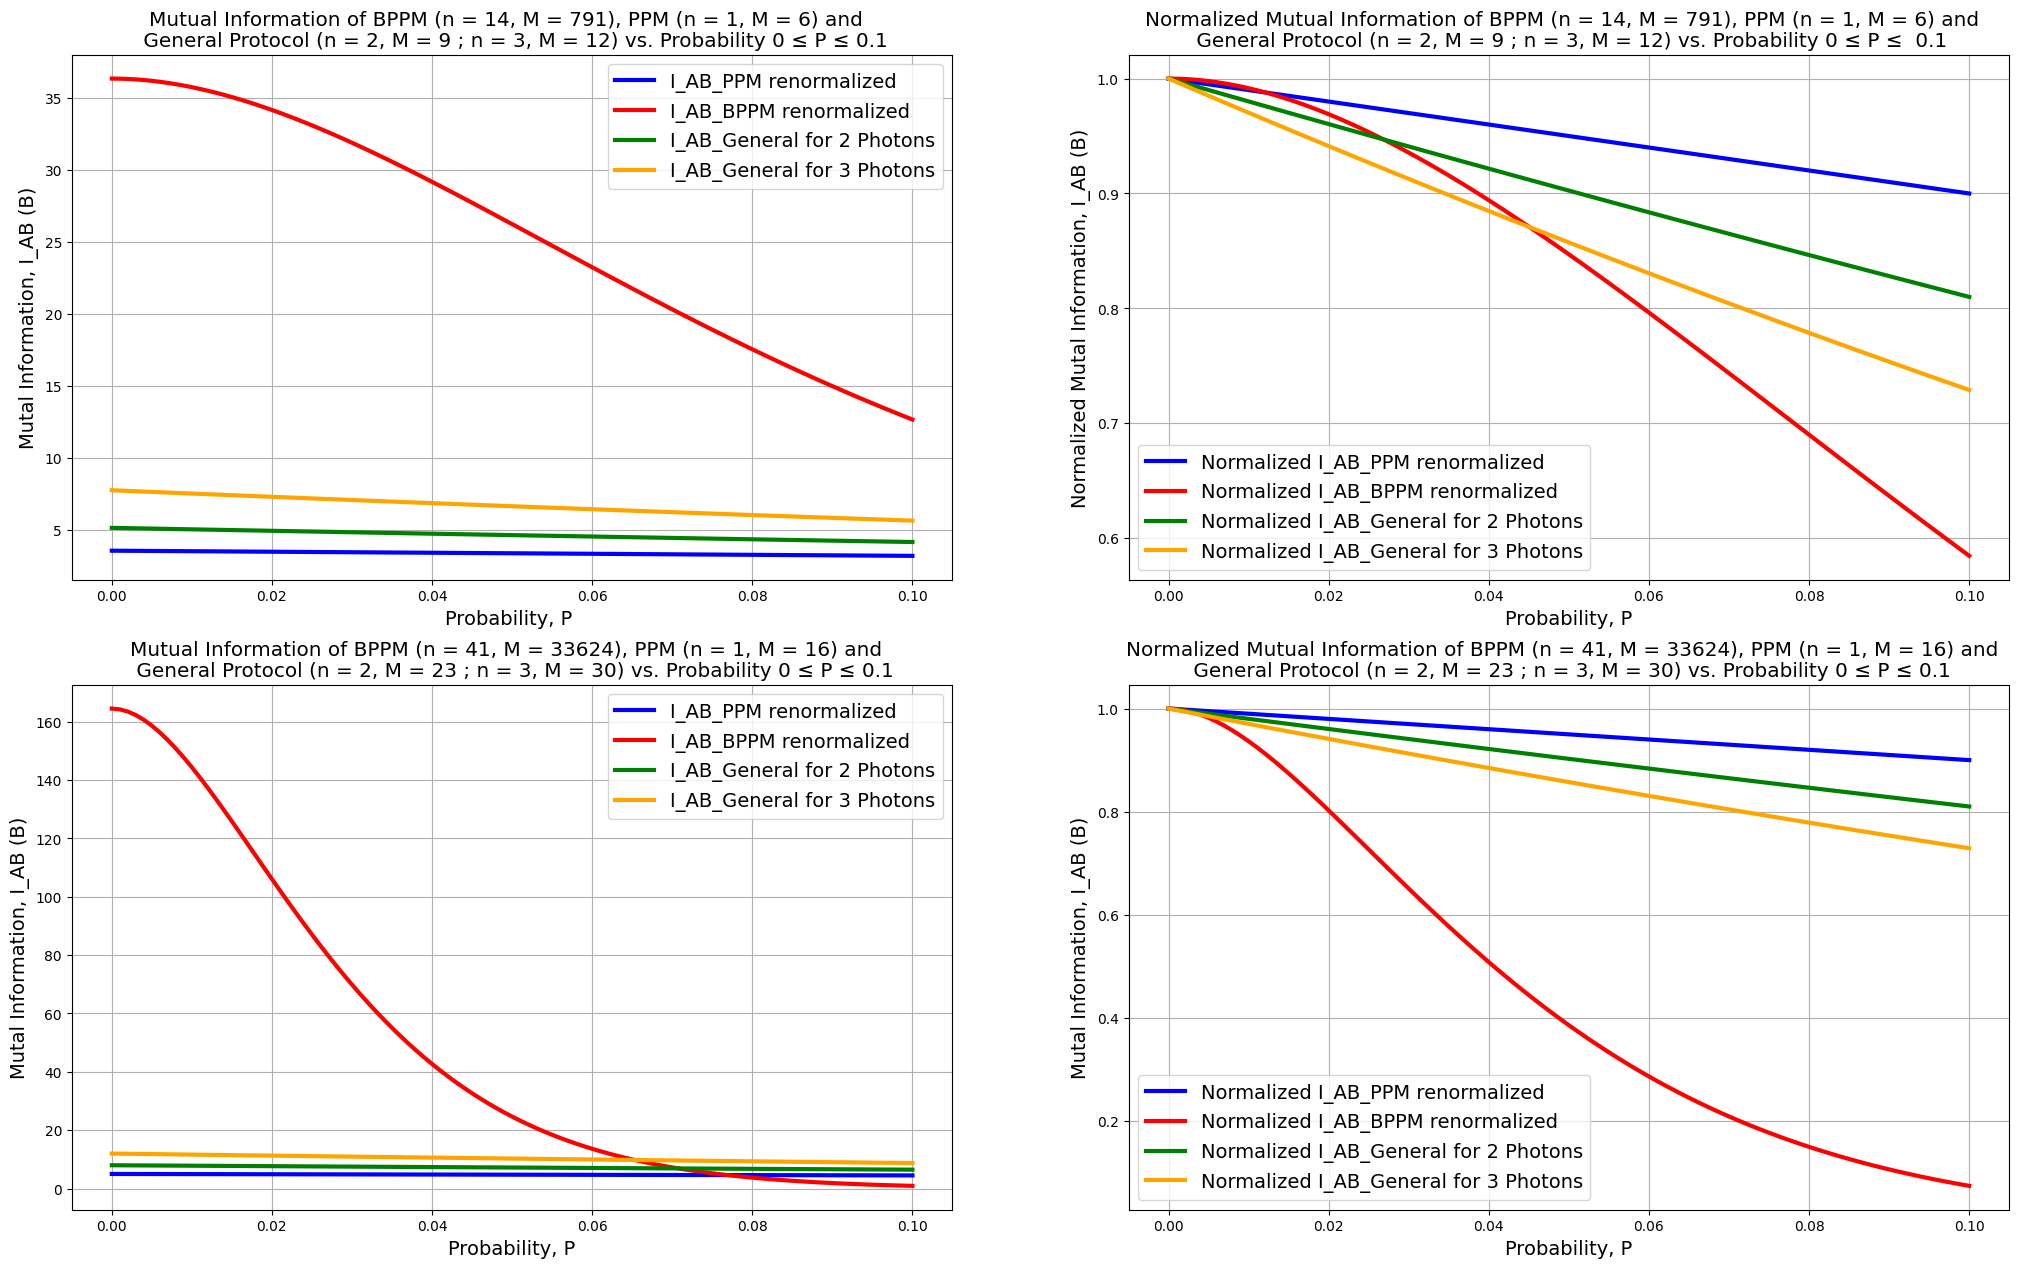

In [154]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(P_list, I_AB_PPM_list_14, label='I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[0, 0].plot(P_list, I_AB_BPPM_list_14, label='I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[0, 0].plot(P_list, I_AB_General_n2_list_14, label='I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[0, 0].plot(P_list, I_AB_General_n3_list_14, label='I_AB_General for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[0, 0].set_title('Mutual Information of BPPM (n = 14, M = 791), PPM (n = 1, M = 6) and  \n General Protocol (n = 2, M = 9 ; n = 3, M = 12) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')
axis[0, 0].set_xlabel('Probability, P ', fontsize = 14)
axis[0, 0].set_ylabel('Mutal Information, I_AB (B)', fontsize = 14)
axis[0, 0].grid(True)
axis[0, 0].legend(fontsize=14)

axis[0, 1].plot(P_list, Normalized_I_AB_PPM_list_14, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[0, 1].plot(P_list, Normalized_I_AB_BPPM_list_14, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[0, 1].plot(P_list, Normalized_I_AB_General_n2_list_14, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[0, 1].plot(P_list, Normalized_I_AB_General_n3_list_14, label='Normalized I_AB_General for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[0, 1].set_title('Normalized Mutual Information of BPPM (n = 14, M = 791), PPM (n = 1, M = 6) and  \n General Protocol (n = 2, M = 9 ; n = 3, M = 12) vs. Probability 0 \u2264 P \u2264  0.1', fontsize='x-large')
axis[0, 1].set_xlabel('Probability, P', fontsize = 14)
axis[0, 1].set_ylabel('Normalized Mutal Information, I_AB (B)', fontsize = 14)
axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=14)

axis[1, 0].plot(P_list, I_AB_PPM_list_41, label='I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[1, 0].plot(P_list, I_AB_BPPM_list_41, label='I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[1, 0].plot(P_list, I_AB_General_n2_list_41, label='I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[1, 0].plot(P_list, I_AB_General_n3_list_41, label='I_AB_General for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[1, 0].set_title('Mutual Information of BPPM (n = 41, M = 33624), PPM (n = 1, M = 16) and  \n General Protocol (n = 2, M = 23 ; n = 3, M = 30) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')
axis[1, 0].set_xlabel('Probability, P', fontsize = 14)
axis[1, 0].set_ylabel('Mutal Information, I_AB (B)', fontsize = 14)
axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=14)

axis[1, 1].plot(P_list, Normalized_I_AB_PPM_list_41, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[1, 1].plot(P_list, Normalized_I_AB_BPPM_list_41, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[1, 1].plot(P_list, Normalized_I_AB_General_n2_list_41, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[1, 1].plot(P_list, Normalized_I_AB_General_n3_list_41, label='Normalized I_AB_General for 3 Photons',color ='orange', linewidth=3, alpha=1)
axis[1, 1].set_title('Normalized Mutual Information of BPPM (n = 41, M = 33624), PPM (n = 1, M = 16) and  \n General Protocol (n = 2, M = 23 ; n = 3, M = 30) vs. Probability 0 \u2264 P \u2264 0.1', fontsize='x-large')
axis[1, 1].set_xlabel('Probability, P', fontsize = 14)
axis[1, 1].set_ylabel('Mutal Information, I_AB (B)', fontsize = 14)
axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=14)

figure.set_facecolor("white")
plt.savefig('protocol/MI_EPI_4schemes_Plot.png', dpi=450, bbox_inches='tight')
plt.show()